# Analysis

1. Merge Data
2. Correlation Analysis
3. Multivariate Analysis
5. Dimensionality Reduction: Principal component analysis (PCA)

## 1. Merge Patient Data and Gene Expression Data

In [359]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [360]:
#Import data
df_Patient = pd.read_csv('df_Patient_working')

df_Patient.shape

(62, 9)

In [361]:
#Import data
df_GeneEx = pd.read_csv('df_GeneEx_working')

df_GeneEx.shape

(62, 1936)

In [362]:
#merge file
df_merge = pd.merge(df_Patient, df_GeneEx, how='inner', on='ID_REF')
df_merge

,ID_REF,Age_Years,Dukes_Stage,Gender,Location,DFS_Months,DFS_Event,Adj_Radio,Adj_Chem,117_at,...,1554911_at,1554912_at,1554914_at,1554915_a_at,1554916_a_at,1554918_a_at,1554919_s_at,1554920_at,213418_at,1554921_a_at
0,GSM877126,62.0,A,Male,Left,108.0,0.0,1.0,0.0,6.029834,...,3.504809,2.856109,3.130712,5.603126,3.091348,4.009692,4.350400,2.512026,7.494499,4.030978
1,GSM877127,77.0,B,Male,Left,40.0,1.0,1.0,0.0,6.344321,...,3.957833,2.988643,3.484177,6.601744,3.141737,4.679732,4.508760,2.427697,8.156995,2.827090
2,GSM877128,66.0,C,Female,Left,49.0,0.0,1.0,0.0,5.023127,...,3.749518,2.610840,3.406207,6.003205,3.469987,4.781843,4.435054,2.531300,6.058687,2.930454
3,GSM877129,72.0,D,Female,Left,45.0,0.0,1.0,1.0,4.612727,...,3.610429,2.728274,3.534871,5.858326,3.372291,3.653575,5.014994,2.608755,5.488072,2.949848
4,GSM877130,75.0,C,Male,Left,40.0,0.0,0.0,1.0,5.865944,...,3.520434,2.664744,3.314746,5.388115,3.322147,4.666360,5.013006,2.657130,7.410725,3.054697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,GSM877184,54.0,C,Male,Left,22.0,1.0,0.0,0.0,4.835558,...,3.637413,2.787781,3.519436,6.026848,3.404074,4.103411,4.303329,2.422700,6.072618,2.853109
58,GSM877185,48.0,D,Male,Right,64.0,0.0,1.0,0.0,5.694010,...,3.733335,3.473473,3.237316,6.167214,3.452096,4.724017,4.470426,2.634358,7.175365,2.667533
59,GSM877186,65.0,C,Male,Left,25.0,1.0,1.0,0.0,8.661629,...,3.436002,2.706722,3.349033,6.238026,3.109042,6.897634,3.797626,2.756086,10.121831,2.971542
60,GSM877187,71.0,A,Male,Rectum,58.0,1.0,1.0,0.0,5.702601,...,3.438260,2.539084,3.334590,5.842051,3.496104,4.883845,4.661893,2.581452,7.232090,2.719928


In [363]:
#copy working file to preserve the original file
df_merge_working = df_merge.copy(deep=True)
df_merge_working

,ID_REF,Age_Years,Dukes_Stage,Gender,Location,DFS_Months,DFS_Event,Adj_Radio,Adj_Chem,117_at,...,1554911_at,1554912_at,1554914_at,1554915_a_at,1554916_a_at,1554918_a_at,1554919_s_at,1554920_at,213418_at,1554921_a_at
0,GSM877126,62.0,A,Male,Left,108.0,0.0,1.0,0.0,6.029834,...,3.504809,2.856109,3.130712,5.603126,3.091348,4.009692,4.350400,2.512026,7.494499,4.030978
1,GSM877127,77.0,B,Male,Left,40.0,1.0,1.0,0.0,6.344321,...,3.957833,2.988643,3.484177,6.601744,3.141737,4.679732,4.508760,2.427697,8.156995,2.827090
2,GSM877128,66.0,C,Female,Left,49.0,0.0,1.0,0.0,5.023127,...,3.749518,2.610840,3.406207,6.003205,3.469987,4.781843,4.435054,2.531300,6.058687,2.930454
3,GSM877129,72.0,D,Female,Left,45.0,0.0,1.0,1.0,4.612727,...,3.610429,2.728274,3.534871,5.858326,3.372291,3.653575,5.014994,2.608755,5.488072,2.949848
4,GSM877130,75.0,C,Male,Left,40.0,0.0,0.0,1.0,5.865944,...,3.520434,2.664744,3.314746,5.388115,3.322147,4.666360,5.013006,2.657130,7.410725,3.054697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,GSM877184,54.0,C,Male,Left,22.0,1.0,0.0,0.0,4.835558,...,3.637413,2.787781,3.519436,6.026848,3.404074,4.103411,4.303329,2.422700,6.072618,2.853109
58,GSM877185,48.0,D,Male,Right,64.0,0.0,1.0,0.0,5.694010,...,3.733335,3.473473,3.237316,6.167214,3.452096,4.724017,4.470426,2.634358,7.175365,2.667533
59,GSM877186,65.0,C,Male,Left,25.0,1.0,1.0,0.0,8.661629,...,3.436002,2.706722,3.349033,6.238026,3.109042,6.897634,3.797626,2.756086,10.121831,2.971542
60,GSM877187,71.0,A,Male,Rectum,58.0,1.0,1.0,0.0,5.702601,...,3.438260,2.539084,3.334590,5.842051,3.496104,4.883845,4.661893,2.581452,7.232090,2.719928


## 2. Correlation Analysis

### 2.1 Correlation analysis of expression levels of different genes
Correlation coefficients (r) between the expression levels of different genes are calculated. The pairs of genes with r > 0.8 are visualized using a heatmap.

In [364]:
# Calculate the pairwise Pearson correlation matrix
correlation_matrix = df_merge_working.iloc[:, 9:].corr(method='pearson')
correlation_matrix.head(5)

,117_at,1007_s_at,1053_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,1554911_at,1554912_at,1554914_at,1554915_a_at,1554916_a_at,1554918_a_at,1554919_s_at,1554920_at,213418_at,1554921_a_at
117_at,1.000000,-0.099369,0.080373,0.009265,-0.022102,-0.002092,-0.143740,0.273592,0.413378,0.011632,...,-0.066865,-0.219184,-0.041823,0.005219,0.296110,0.139806,-0.101631,0.092978,0.971157,0.141863
1007_s_at,-0.099369,1.000000,0.151216,0.140696,-0.296744,-0.132789,0.170456,-0.121127,-0.335551,-0.027116,...,0.193074,-0.233755,0.076640,-0.002627,-0.012590,0.058515,-0.098946,0.190639,-0.157949,0.054757
1053_at,0.080373,0.151216,1.000000,0.108447,-0.094176,-0.340061,-0.176444,0.080547,-0.118642,0.153022,...,0.259641,-0.033861,0.250227,0.404327,0.201963,-0.028078,-0.231881,-0.092918,0.030052,-0.168225
121_at,0.009265,0.140696,0.108447,1.000000,-0.115394,0.005294,0.043071,-0.053253,-0.015794,0.029867,...,0.175020,-0.217348,0.223074,-0.120765,0.287179,-0.066679,-0.076441,-0.033876,-0.046542,-0.102980
1255_g_at,-0.022102,-0.296744,-0.094176,-0.115394,1.000000,-0.043166,-0.160460,0.059511,0.089073,-0.008238,...,-0.107441,0.067670,-0.229011,-0.323087,-0.048563,-0.183211,0.197362,-0.000196,0.050985,0.080301


In [365]:
# Set the threshold for correlation coefficient
r_threshold = 0.8

# Extract gene pairs with correlation greater than the threshold
high_correlation_genes = []
individual_genes_list = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i,j]) > r_threshold:
            gene_pair = (correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i,j])
            high_correlation_genes.append(gene_pair)
            individual_genes_list.append(correlation_matrix.columns[i])
            individual_genes_list.append(correlation_matrix.columns[j])

# Create a DataFrame with highly correlated gene pairs
column_list = ['Gene_1', 'Gene_2', 'Correlation_coefficient']
df_high_correlation_genes = pd.DataFrame(high_correlation_genes, columns=column_list)
df_high_correlation_genes.sort_values(by=['Correlation_coefficient'], ascending=False)

,Gene_1,Gene_2,Correlation_coefficient
37,1553185_at,1553186_x_at,0.993569
21,1552502_s_at,1554897_s_at,0.981540
12,1552348_at,1552349_a_at,0.978361
40,1553569_at,1553570_x_at,0.976309
45,1553994_at,1553995_a_at,0.975759
...,...,...,...
30,1552807_a_at,1553043_a_at,0.807875
10,1552316_a_at,1553906_s_at,0.807789
33,1552929_at,1553924_at,0.804298
35,1553043_a_at,1554899_s_at,0.803498


<Axes: xlabel='1553185_at', ylabel='1553186_x_at'>

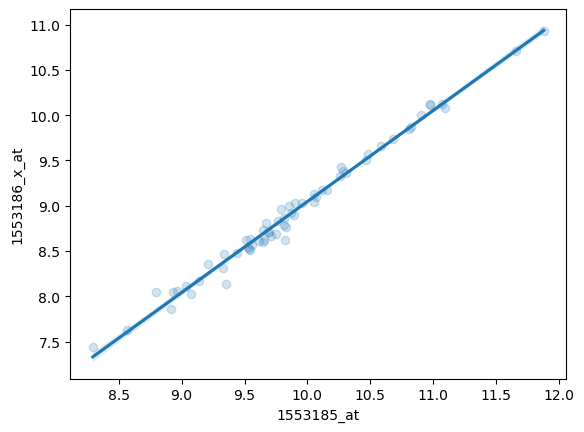

In [366]:
#scatter plot the relationship between gene expressin values of 1553185_at and 1553186_x_at
sns.regplot(data=df_merge_working, x="1553185_at", y="1553186_x_at", fit_reg=True, scatter_kws={"alpha": 0.2})

In [367]:
print(individual_genes_list)

['117_at', '213418_at', '1405_i_at', '1552316_a_at', '1405_i_at', '1554240_a_at', '1552263_at', '1552264_a_at', '1552288_at', '1552289_a_at', '1552309_a_at', '1554007_at', '1552309_a_at', '1554127_s_at', '1552315_at', '1552316_a_at', '1552315_at', '1552318_at', '1552316_a_at', '1552318_at', '1552316_a_at', '1553906_s_at', '1552316_a_at', '1554240_a_at', '1552348_at', '1552349_a_at', '1552365_at', '1552367_a_at', '1552368_at', '1552929_at', '1552368_at', '1553138_a_at', '1552368_at', '1553321_a_at', '1552368_at', '1553924_at', '1552386_at', '1552732_at', '1552389_at', '1552390_a_at', '1552502_s_at', '1554895_a_at', '1552502_s_at', '1554897_s_at', '1552532_a_at', '1553989_a_at', '1552612_at', '1552613_s_at', '1552621_at', '1552622_s_at', '1552701_a_at', '1552703_s_at', '1552789_at', '1552790_a_at', '1552799_at', '1554274_a_at', '1552799_at', '1554384_at', '1552799_at', '1554385_a_at', '1552807_a_at', '1553043_a_at', '1552807_a_at', '1554240_a_at', '1552929_at', '1553321_a_at', '1552929_a

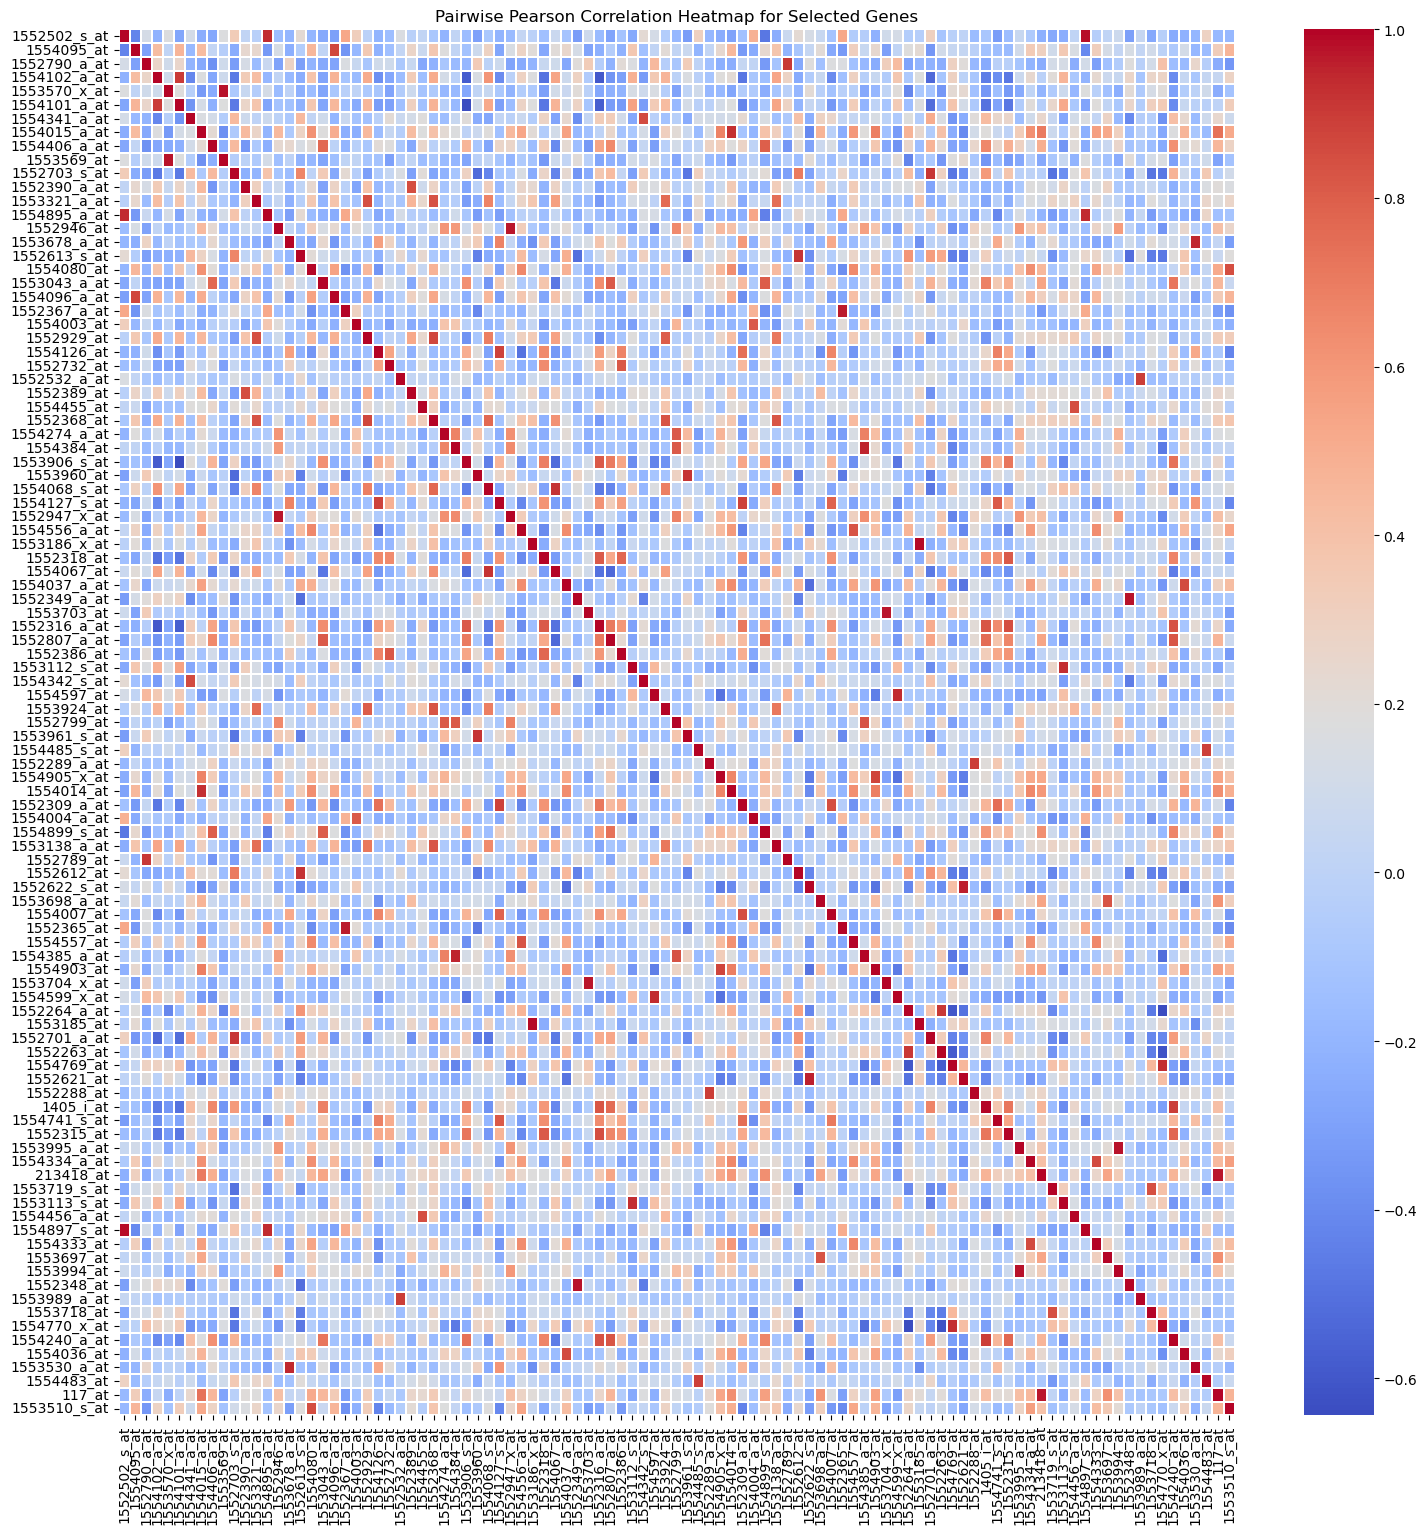

In [368]:
# Extract unique genes from individual_genes_list
unique_genes = list(set(individual_genes_list))

# Extract the relevant rows and columns from the correlation matrix
selected_correlation_matrix = correlation_matrix.loc[unique_genes, unique_genes]

# Plot heatmap
plt.figure(figsize=(18, 18))
sns.heatmap(selected_correlation_matrix, annot=None, cmap='coolwarm', fmt='.2f', linewidths=0.05, xticklabels=True, yticklabels=True)
plt.title('Pairwise Pearson Correlation Heatmap for Selected Genes')
plt.show()

### 2.2 Correlation analysis of expression levels of different genes and Disease-Free Survival (DFS) months

In [369]:
import pandas as pd
from scipy.stats import pearsonr

def calculate_correlation(variable1, variable2):

    """Calculate correlation coefficient and p-value between two variables

    Parameters:
    - varible1: Name of the variable 1 column
    - varible2: Name of the variable 2 column

    Returns:
    - correlation_coefficient: Pearson correlation coefficient
    - p_value: p-value  """
    
    correlation_cofficient, p_value = pearsonr(varible1, variable2)
    return correlation_cofficient, p_value

In [370]:
#Extract gene expression and DFS columns
geneEx_columns = df_merge_working.iloc[: , 9:]
DFS_Months_column = df_merge_working['DFS_Months']

#Make a list of genes with r > 0.8 and p-value < 0.05
significant_genes = []

for gene in geneEx_columns.columns:
    correlation_cofficient, p_value = pearsonr(geneEx_columns[gene], DFS_Months_column)
    if abs(correlation_cofficient) > 0.8 and p_value < 0.05:
        significant_genes.append(gene)
    
print('List of genes that correlate with DFS months with r > 0.8 and a p-value < 0.05:')
print(significant_genes)

List of genes that correlate with DFS months with r > 0.8 and a p-value < 0.05:
[]


## 3. Multivariate Analysis
Multivariate analysis using variables such as Dukes stage, Location, Gender, and DFS event will be performed. During exploratory data analysis (EDA) of the gene expression data, we utilized the Shapiro-Wilk test to assess normality. The test confirmed that the data follows a normal distribution. Now, the next step is to perform one-way ANOVA to examine the mean differences between groups, where each gene serves as a grouping variable. This analysis will help us understand if there are statistically significant differences in gene expression levels across the various groups.

### 3.1.  Mean gene expression distribution across groups

### Location (Colon, Left, Rectum, and Right)

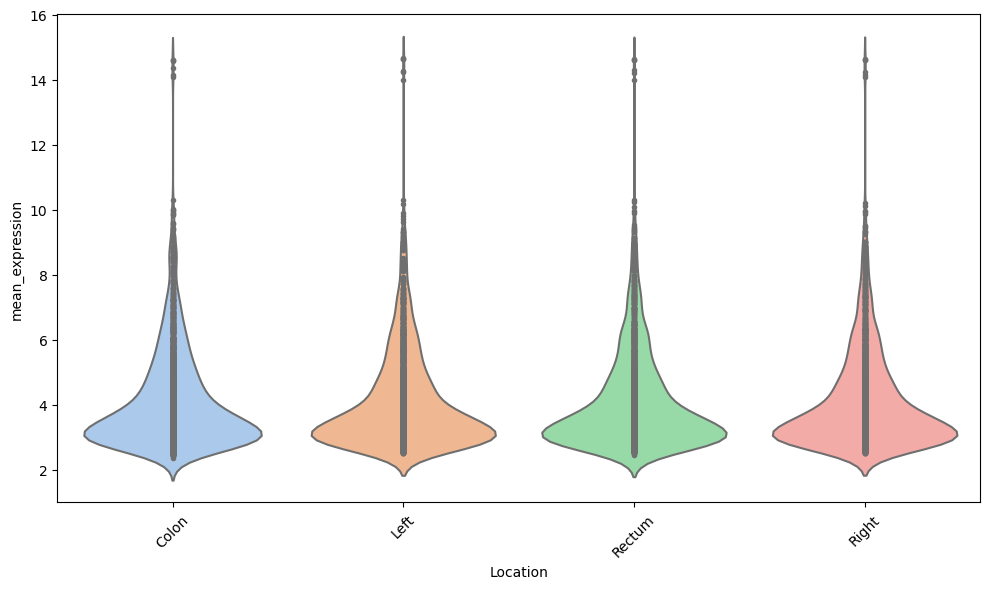

In [371]:
from meanGeneEx_distribution import meanGeneEx_distribution 
meanGeneEx_distribution(df_merge_working, 'Location', 4)

### Dukes stage (A, B, C, and D)

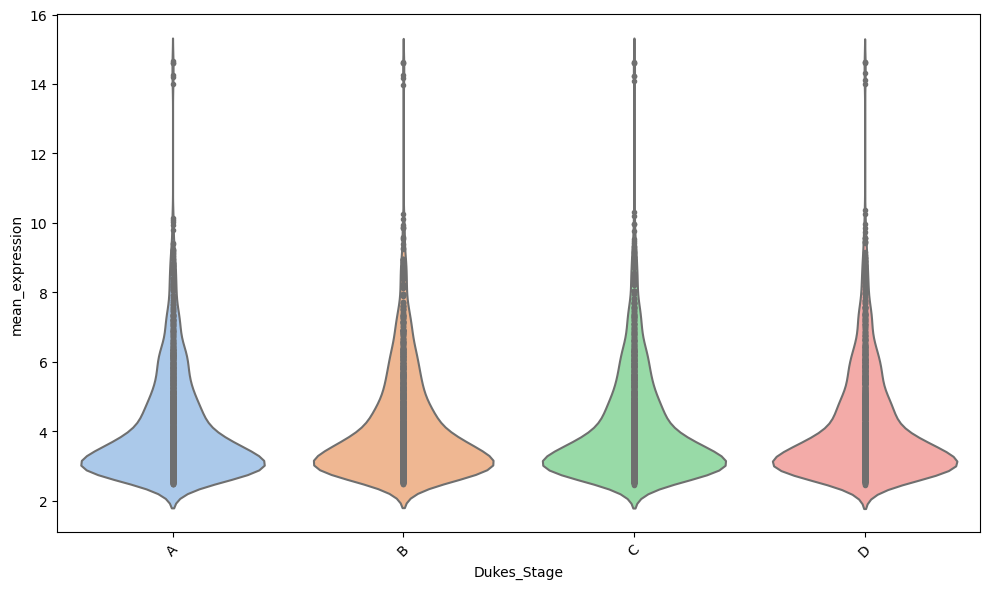

In [372]:
 meanGeneEx_distribution(df_merge_working, 'Dukes_Stage', 2)

### Genders

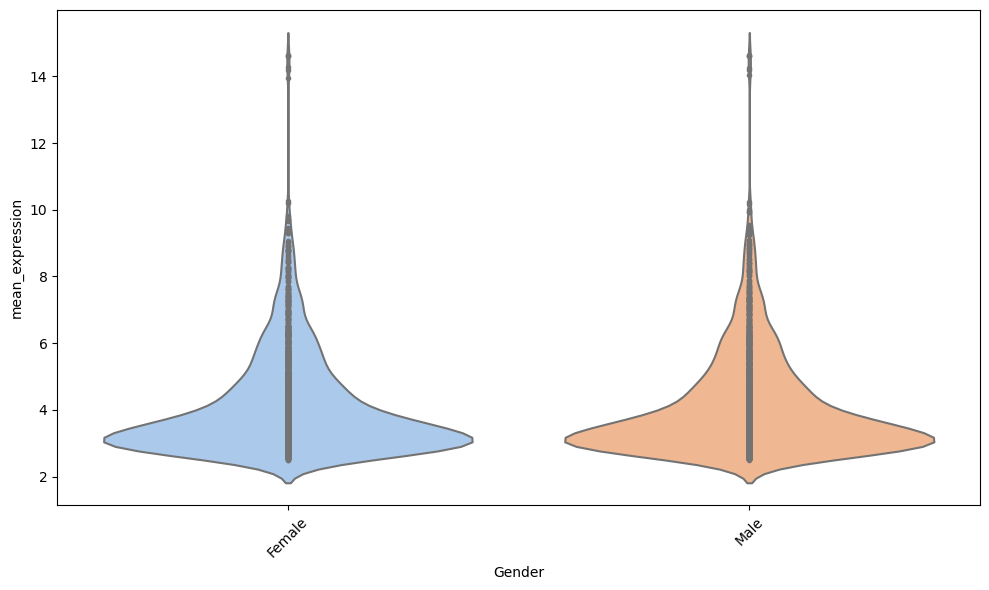

In [373]:
 meanGeneEx_distribution(df_merge_working, 'Gender', 3)

### 3.4. Statistical comparing gene expression across groups

Perform one-way ANOVA for each gene and a subgroup by the location column in the DataFrame with the threshold < 0.01.

### Locations (Colon, Left, Rectum, and Right)

In [374]:
from geneEx_ANOVA import geneEx_ANOVA

significant_genes, df_ANOVA_all = geneEx_ANOVA(df_merge_working, 'Location', 0.01)
sorted_significant_genes = sorted(significant_genes)
print (sorted_significant_genes)

['1431_at', '1552674_at', '1552813_at', '1552852_a_at', '1552857_a_at', '1553028_at', '1553071_a_at', '1553081_at', '1553177_at', '1553295_at', '1553403_at', '1554017_at', '1554106_at', '1554479_a_at']


In [375]:
df_ANOVA_all.sort_values(by='p_value')

,Gene,f_statistic,p_value
590,1553081_at,7.800277,0.000185
659,1553177_at,5.283142,0.002734
1597,1554479_a_at,5.160819,0.003134
745,1553295_at,5.131381,0.003239
425,1552852_a_at,5.128237,0.003250
...,...,...,...
1489,1554328_at,0.016353,0.997118
189,1552522_at,0.014976,0.997471
277,1552649_a_at,0.014018,0.997707
48,1552310_at,0.012721,0.998016


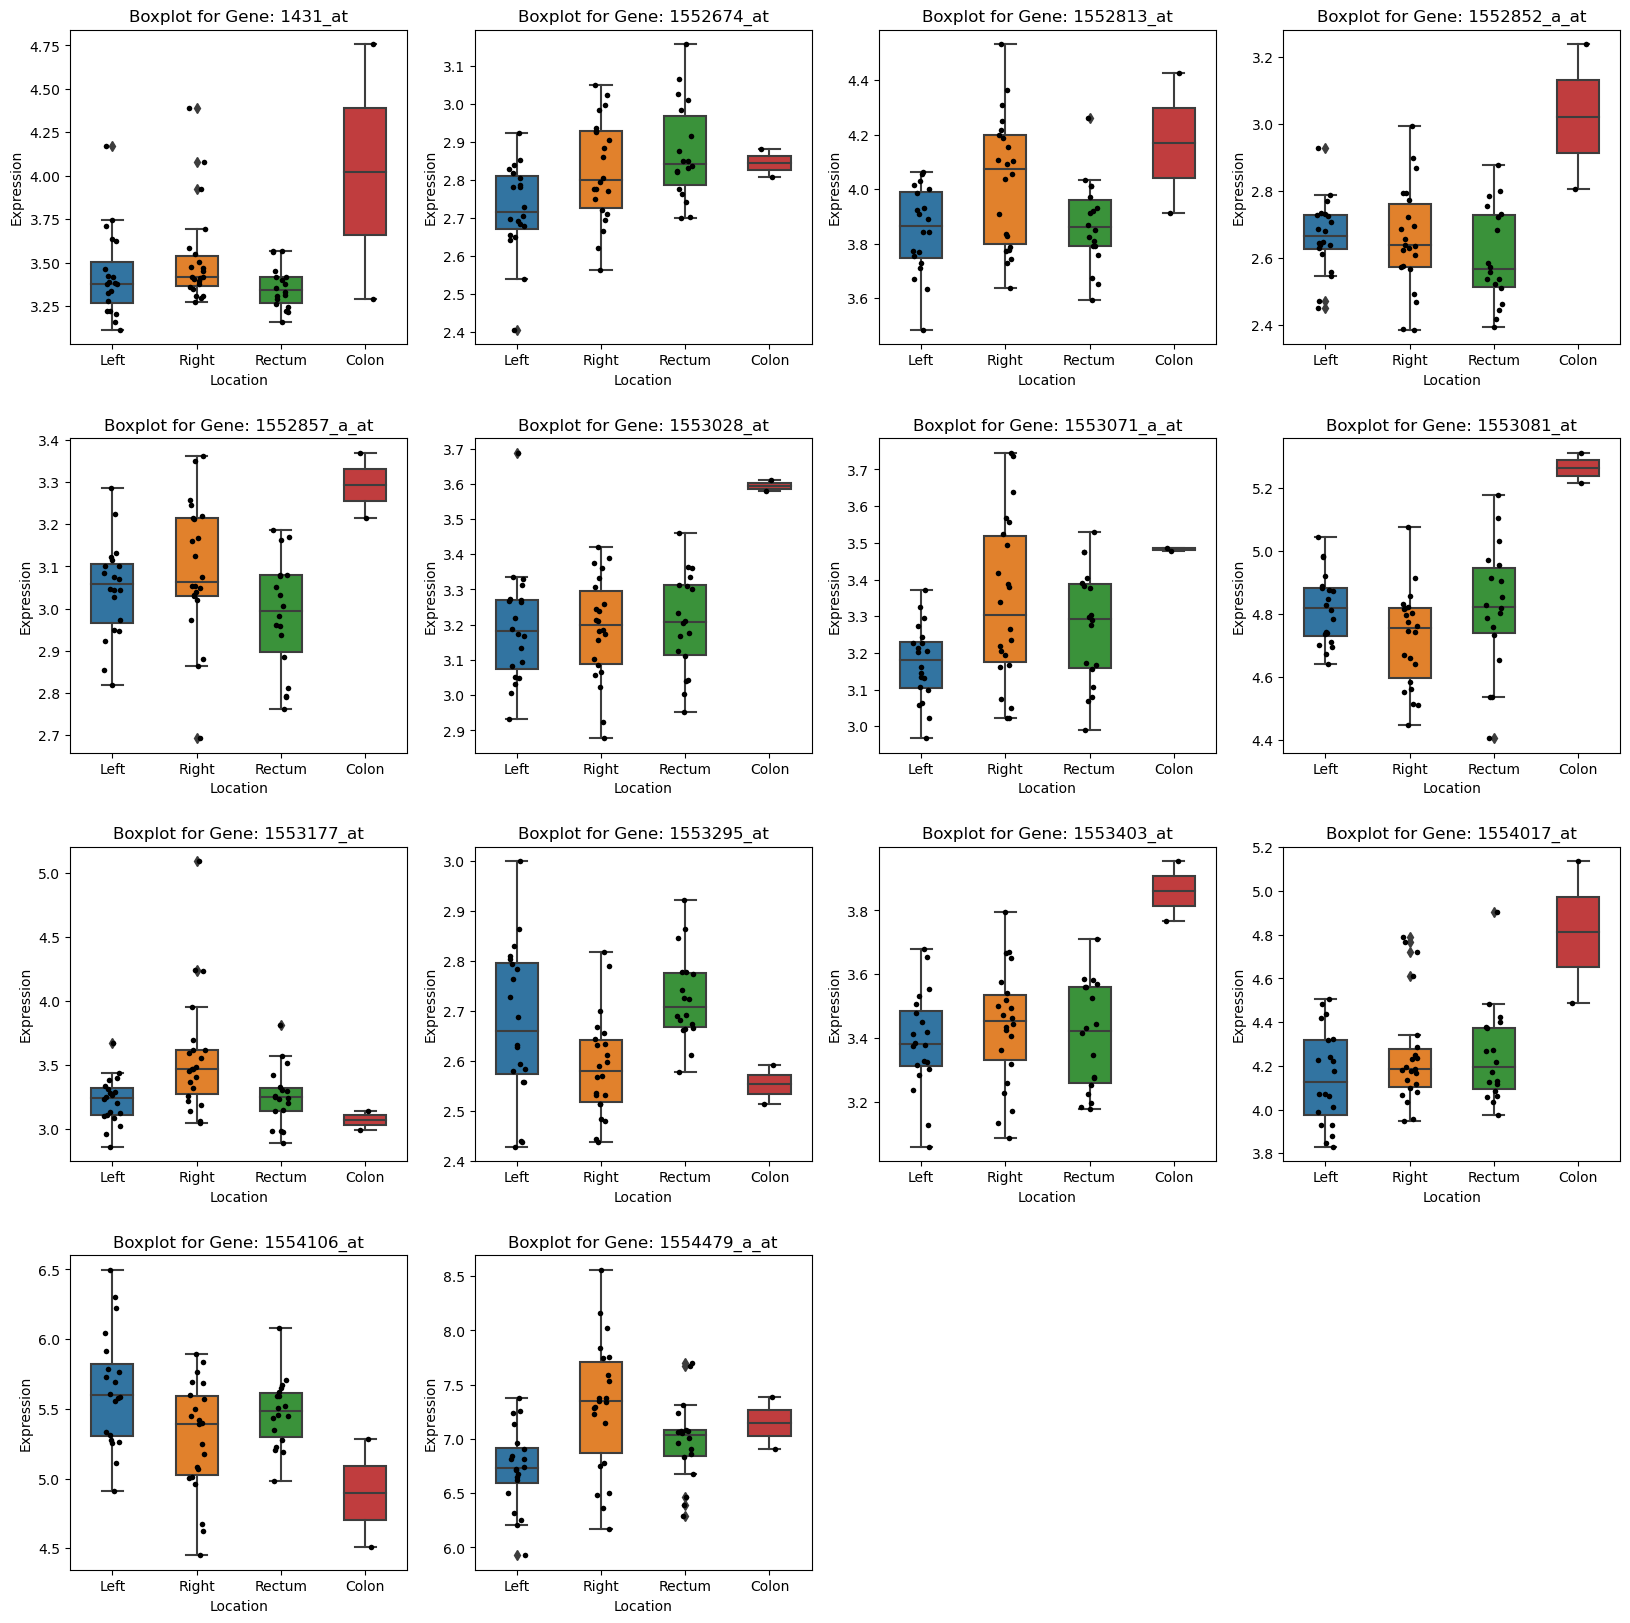

Significant genes: ['1431_at', '1552674_at', '1552813_at', '1552852_a_at', '1552857_a_at', '1553028_at', '1553071_a_at', '1553081_at', '1553177_at', '1553295_at', '1553403_at', '1554017_at', '1554106_at', '1554479_a_at']


In [376]:
from geneEx_ANOVA import main

significant_genes_Location = main(df_merge_working, 'Location', 0.01)
print(f"Significant genes: {significant_genes}")

### Dukes stage (A, B, C, and D)

In [377]:
significant_genes, df_ANOVA_all = geneEx_ANOVA(df_merge_working, 'Dukes_Stage', 0.01)
sorted_significant_genes = sorted(significant_genes)
print (sorted_significant_genes)

['1553070_a_at', '1553111_a_at', '1553351_at', '1553403_at', '1553584_at', '1553608_a_at', '1553611_s_at', '1553815_a_at', '1554430_at', '1554577_a_at', '1554690_a_at']


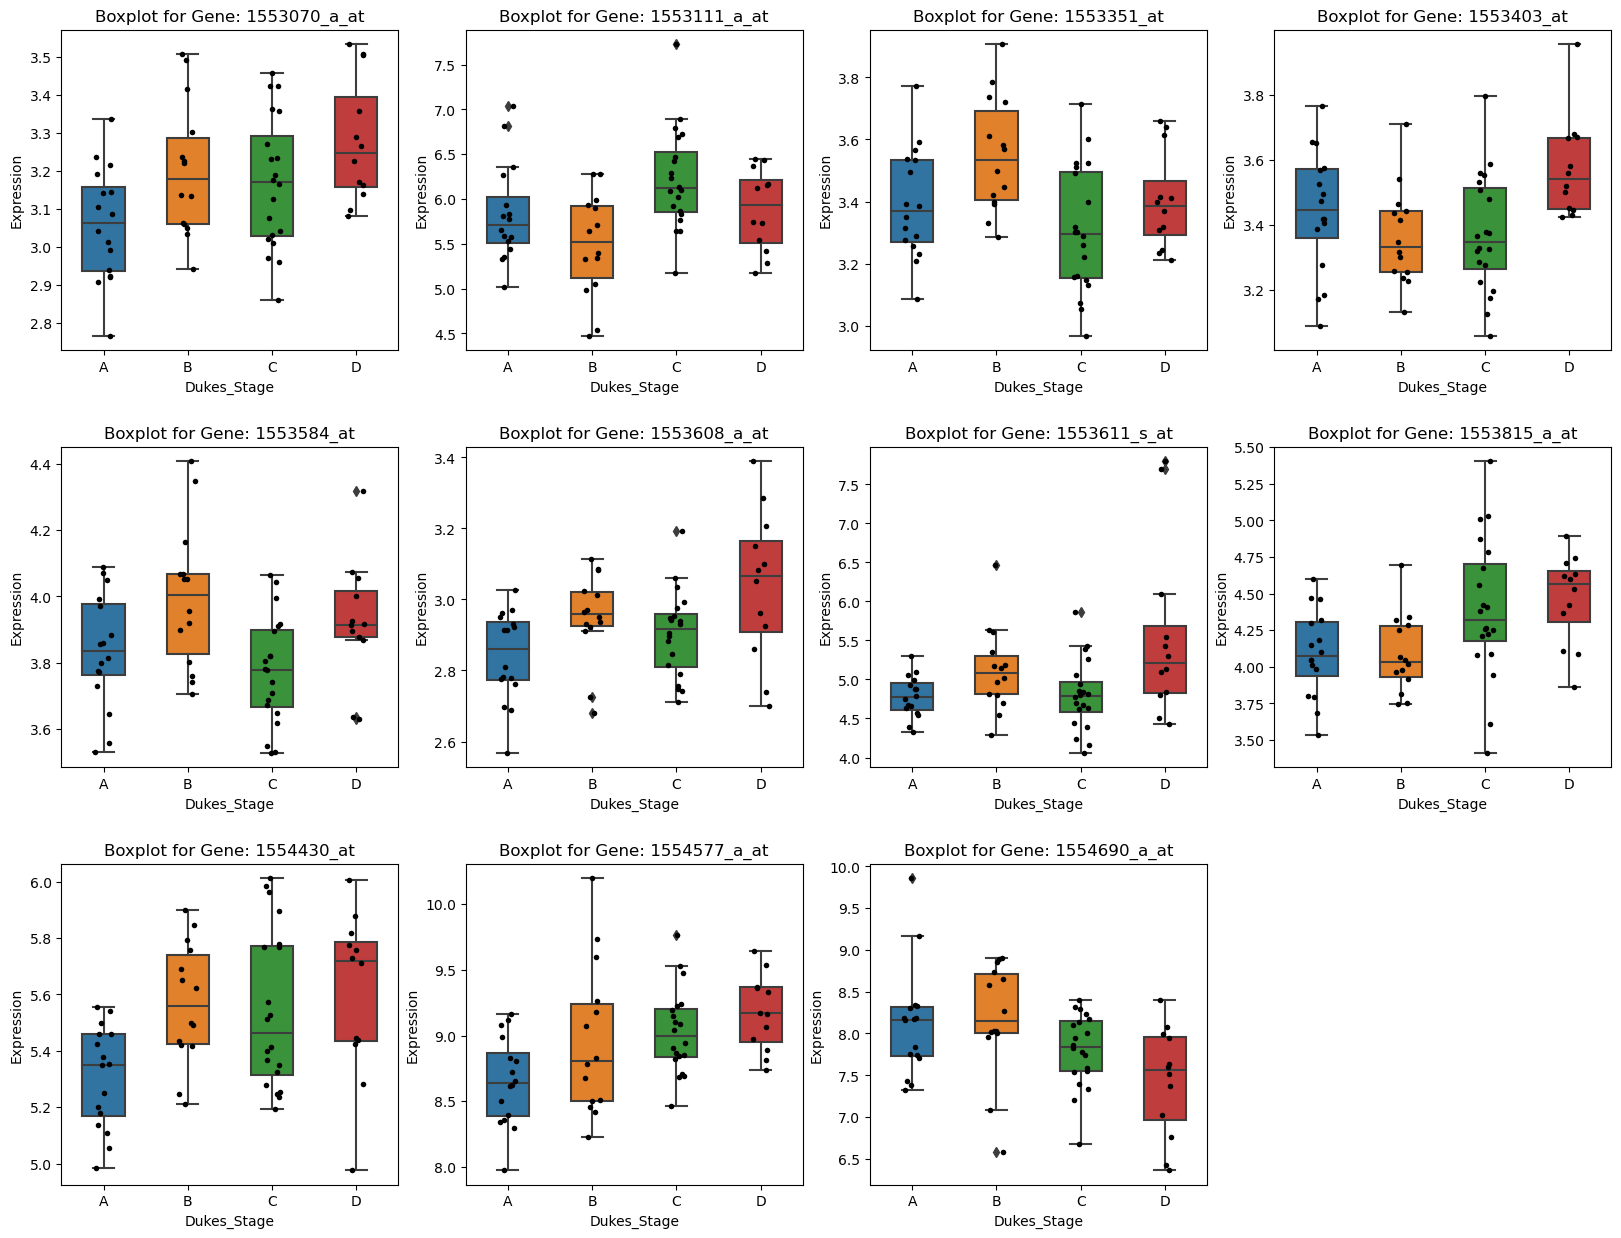

Significant genes: ['1553070_a_at', '1553111_a_at', '1553351_at', '1553403_at', '1553584_at', '1553608_a_at', '1553611_s_at', '1553815_a_at', '1554430_at', '1554577_a_at', '1554690_a_at']


In [378]:
significant_genes_Dukes = main(df_merge_working, 'Dukes_Stage', 0.01)
print(f"Significant genes: {significant_genes}")

### Genders

In [379]:
significant_genes, df_ANOVA_all = geneEx_ANOVA(df_merge_working, 'Gender', 0.01)
print (significant_genes)

['1552980_at', '1553079_at', '1553685_s_at', '1554155_at', '1554235_at', '1554468_s_at', '1554549_a_at']


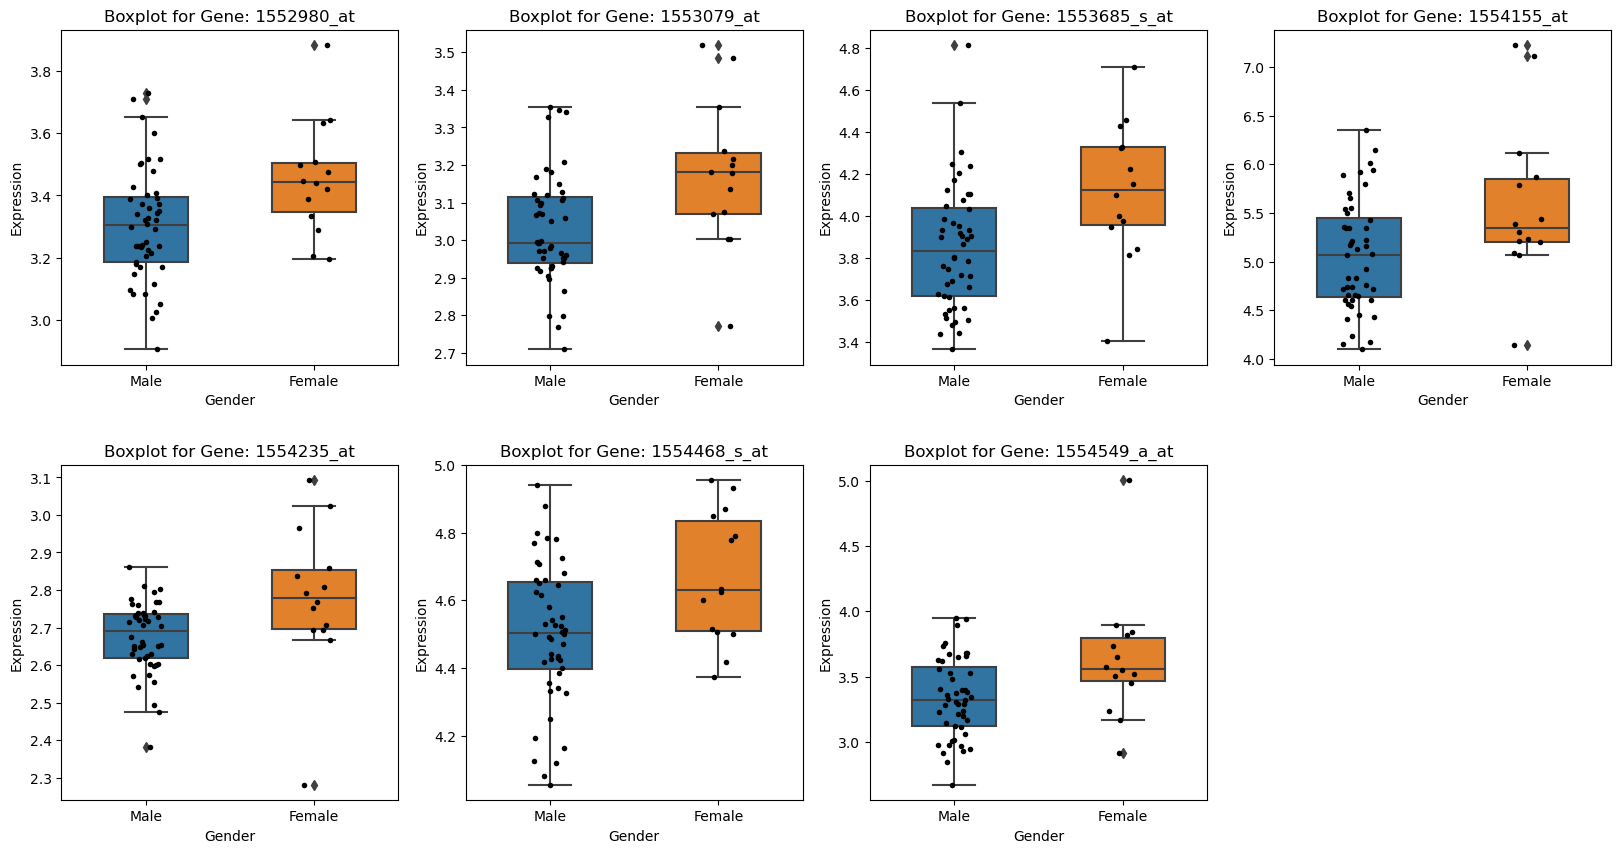

Significant genes: ['1552980_at', '1553079_at', '1553685_s_at', '1554155_at', '1554235_at', '1554468_s_at', '1554549_a_at']


In [380]:
significant_genes_Gender = main(df_merge_working, 'Gender', 0.01)
print(f"Significant genes: {significant_genes}")

In [381]:
#find the intersection of the lists
intersection_genes = set(significant_genes_Location).intersection(set(significant_genes_Gender))

print(f"Intersection of significant genes in Location and Gender: {intersection_genes}")

Intersection of significant genes in Location and Gender: set()


In [382]:
intersection_genes = set(significant_genes_Location).intersection(set(significant_genes_Dukes), set(significant_genes_Gender))

print(f"Intersection of significant genes in Location, Dukes, and Gender: {intersection_genes}")

Intersection of significant genes in Location, Dukes, and Gender: set()


In [383]:
intersection_genes = set(significant_genes_Location).intersection(set(significant_genes_Dukes))
print(f"Intersection of significant genes in Location and Dukes: {intersection_genes}")

Intersection of significant genes in Location and Dukes: {'1553403_at'}


1553403_at is RLN3 gene

## 4. Dimensionality Reduction: Principal component analysis (PCA)

Principal Component Analysis (PCA) is a linear dimensionality reduction technique. I will perform PCA on both the transposed dataset (where rows represent genes and columns represent samples) and the original dataset (where rows represent samples and columns represent genes).

### 4.1. Performing PCA on the transposed dataset (genes as rows, samples as columns)
It allows you to identify patterns and relationships among genes based on their expression across different samples. This can help in tasks such as identifying sets of genes that are co-expressed.

**Note:**<br>
- Variables = Individual samples
- Dimensions = Genes
- Principal Components capture patterns among samples based on gene expression profiles (capturing the variability across genes)

In [384]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [385]:
transposed_df_merge_working = df_merge_working.T
transposed_df_merge_working

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
ID_REF,GSM877126,GSM877127,GSM877128,GSM877129,GSM877130,GSM877131,GSM877132,GSM877133,GSM877134,GSM877135,...,GSM877179,GSM877180,GSM877181,GSM877182,GSM877183,GSM877184,GSM877185,GSM877186,GSM877187,GSM877188
Age_Years,62.0,77.0,66.0,72.0,75.0,61.0,59.0,50.0,54.0,68.0,...,60.0,69.0,73.0,55.0,63.0,54.0,48.0,65.0,71.0,57.0
Dukes_Stage,A,B,C,D,C,A,C,B,B,C,...,B,D,D,D,D,C,D,C,A,A
Gender,Male,Male,Female,Female,Male,Male,Male,Male,Male,Female,...,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
Location,Left,Left,Left,Left,Left,Right,Left,Right,Right,Rectum,...,Left,Right,Right,Right,Rectum,Left,Right,Left,Rectum,Rectum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554918_a_at,4.009692,4.679732,4.781843,3.653575,4.66636,3.821213,3.976654,4.009738,4.148965,5.11771,...,4.4704,5.307492,4.061537,3.54166,4.134965,4.103411,4.724017,6.897634,4.883845,4.328188
1554919_s_at,4.3504,4.50876,4.435054,5.014994,5.013006,4.685555,4.473672,4.673572,4.655666,3.935249,...,4.902737,4.681975,4.549951,4.632055,4.435984,4.303329,4.470426,3.797626,4.661893,4.682695
1554920_at,2.512026,2.427697,2.5313,2.608755,2.65713,2.683305,2.764213,2.526576,2.407719,2.75326,...,2.649442,2.473462,2.572779,2.712954,2.709632,2.4227,2.634358,2.756086,2.581452,2.529767
213418_at,7.494499,8.156995,6.058687,5.488072,7.410725,8.421115,6.790053,5.367715,6.392214,7.903482,...,7.005759,5.714525,8.285216,6.852151,8.860541,6.072618,7.175365,10.121831,7.23209,5.566607


In [386]:
df_GeneEx_plot = transposed_df_merge_working.iloc[9:,:]
df_GeneEx_plot

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
117_at,6.029834,6.344321,5.023127,4.612727,5.865944,6.863884,5.430316,4.285183,4.903302,6.530134,...,5.111097,4.894901,6.660386,5.407188,7.228848,4.835558,5.69401,8.661629,5.702601,4.500368
1007_s_at,9.468893,9.994204,10.409823,10.596921,10.252547,9.671754,10.863276,9.7883,10.55175,10.165121,...,10.084649,10.353849,10.584126,10.585953,9.579042,10.343581,9.409749,10.427298,10.309094,10.996956
1053_at,7.18709,7.705626,7.934057,7.446374,7.141105,7.040535,7.767728,8.035921,7.869727,7.61557,...,6.119306,7.320403,7.326724,7.776103,8.273184,7.471584,7.488735,7.512632,7.476872,7.453162
121_at,6.807582,6.89313,7.165602,7.071417,7.103383,7.504727,7.067674,7.259019,7.462846,7.476847,...,7.267976,7.556417,6.950901,6.898353,7.240276,7.920227,6.699796,7.046389,7.349701,8.031972
1255_g_at,3.084591,3.118704,2.984632,2.912851,3.383726,2.772535,3.037304,2.98642,3.066619,2.971537,...,2.741116,3.054084,3.186402,2.881039,2.75419,2.888331,3.201511,2.650723,2.858642,2.787537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554918_a_at,4.009692,4.679732,4.781843,3.653575,4.66636,3.821213,3.976654,4.009738,4.148965,5.11771,...,4.4704,5.307492,4.061537,3.54166,4.134965,4.103411,4.724017,6.897634,4.883845,4.328188
1554919_s_at,4.3504,4.50876,4.435054,5.014994,5.013006,4.685555,4.473672,4.673572,4.655666,3.935249,...,4.902737,4.681975,4.549951,4.632055,4.435984,4.303329,4.470426,3.797626,4.661893,4.682695
1554920_at,2.512026,2.427697,2.5313,2.608755,2.65713,2.683305,2.764213,2.526576,2.407719,2.75326,...,2.649442,2.473462,2.572779,2.712954,2.709632,2.4227,2.634358,2.756086,2.581452,2.529767
213418_at,7.494499,8.156995,6.058687,5.488072,7.410725,8.421115,6.790053,5.367715,6.392214,7.903482,...,7.005759,5.714525,8.285216,6.852151,8.860541,6.072618,7.175365,10.121831,7.23209,5.566607


In [387]:
#scaling the data before performing PCA
scaled_data = preprocessing.scale(df_GeneEx_plot)
scaled_data.shape

(1935, 62)

In [388]:
pca = PCA()
pca_data = pca.fit_transform(scaled_data)
pca_data.shape

(1935, 62)

In [389]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

In [390]:
pca_df = pd.DataFrame(pca_data, columns=labels, index=df_GeneEx_plot.index)
pca_df


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62
117_at,8.055728,-0.049033,3.501367,-2.108207,0.094325,1.020339,1.113705,-1.433811,0.110935,-0.569871,...,-0.151181,0.286174,0.375013,-0.033464,-0.049765,0.084301,-0.079920,0.011056,-0.109619,-0.034178
1007_s_at,30.629036,-0.276900,-1.058386,-0.089506,0.979304,-0.145134,0.279328,-0.323029,0.409034,-0.192268,...,-0.168428,0.035919,0.036005,-0.008795,0.079293,-0.108736,0.142374,-0.128543,-0.050593,-0.014752
1053_at,17.212398,-0.110673,-0.082033,-1.077062,0.211482,-0.690141,-0.298953,-0.192902,0.094918,-0.128158,...,0.066668,-0.105084,0.085124,0.024103,0.068963,0.026666,0.028165,0.070285,-0.005559,0.005742
121_at,16.218442,-0.100963,-0.077069,-0.001703,0.224257,-0.494173,-0.189933,-0.163611,-0.433514,0.078856,...,0.031633,0.245418,0.364592,0.203438,-0.224101,-0.104163,0.085223,0.048126,-0.035384,-0.016733
1255_g_at,-5.464340,-0.200115,0.310130,0.321573,0.000536,-0.104698,-0.023782,0.082301,0.042082,0.023035,...,0.061386,-0.120623,-0.245020,-0.133352,-0.027063,0.214078,-0.095077,-0.016670,0.107309,-0.040145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554918_a_at,1.178333,-1.694704,-0.397543,-0.892608,-0.670083,1.538740,0.037095,0.687912,-0.543447,0.075104,...,-0.238390,0.232613,-0.177869,0.040408,0.161946,-0.061265,-0.058129,0.040868,0.174651,-0.050375
1554919_s_at,2.261471,0.181390,0.421378,0.898657,-0.209743,-0.016104,0.089826,-0.075056,0.430354,-0.155880,...,-0.042318,0.191589,0.042193,0.036158,0.364840,0.188835,0.264366,0.195951,0.030304,-0.052077
1554920_at,-7.472309,-0.035347,-0.054505,0.174340,-0.053992,0.142781,0.112533,-0.041834,0.098317,0.082357,...,-0.161934,0.045295,0.099887,-0.084747,-0.028445,0.033181,0.139478,0.044024,-0.058849,-0.065602
213418_at,14.541025,-0.209987,4.781117,-1.906133,-0.025566,1.180967,1.457401,-1.671966,0.401533,-0.466632,...,-0.080074,0.141473,0.237754,-0.099540,-0.279707,-0.080021,-0.184241,0.170821,-0.229691,0.088257


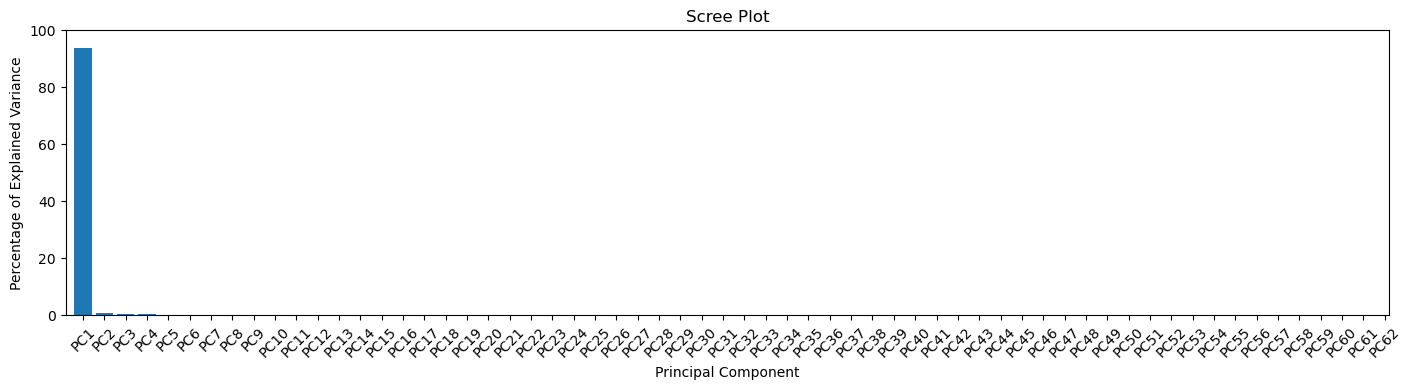

In [391]:
plt.figure(figsize=(14,4))
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0,100)
# Set x-axis limits to start slightly before the first tick
plt.xlim(0.2, len(per_var) + 0.2)
plt.show()

Text(0, 0.5, 'PC2 - 0.7%')

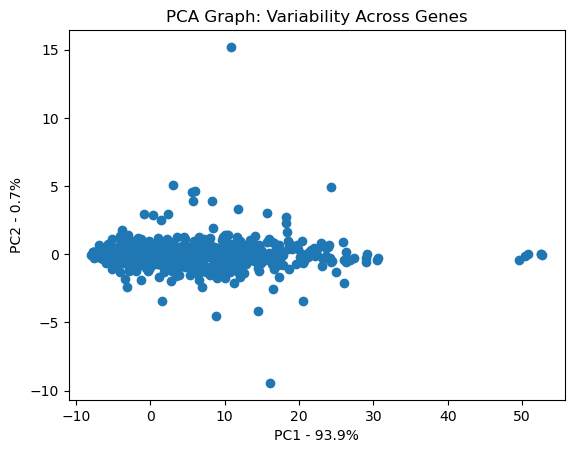

In [392]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PCA Graph: Variability Across Genes')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

### 4.2. Performing PCA on the original dataset (samples as rows, genes as columns)
It allows you to identify patterns and relationships among samples based on their gene expression profiles. This can help in tasks such as clustering similar samples based on their similarity in gene expression or identifying outliers.

**Note:** <br>
- Variables = Gene expression values
- Dimensions = Samples
- Principal Components capture patterns among genes based on their expression profiles across different samples (PCA analyzes the variability in gene expression across samples)

In [393]:
df_features = df_merge_working.iloc[:,9:]
df_features

,117_at,1007_s_at,1053_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,1554911_at,1554912_at,1554914_at,1554915_a_at,1554916_a_at,1554918_a_at,1554919_s_at,1554920_at,213418_at,1554921_a_at
0,6.029834,9.468893,7.187090,6.807582,3.084591,7.397013,6.525426,3.848253,7.572331,3.748200,...,3.504809,2.856109,3.130712,5.603126,3.091348,4.009692,4.350400,2.512026,7.494499,4.030978
1,6.344321,9.994204,7.705626,6.893130,3.118704,7.163797,6.391195,4.202085,8.295322,3.114340,...,3.957833,2.988643,3.484177,6.601744,3.141737,4.679732,4.508760,2.427697,8.156995,2.827090
2,5.023127,10.409823,7.934057,7.165602,2.984632,7.375224,5.538846,4.074462,7.055579,4.172270,...,3.749518,2.610840,3.406207,6.003205,3.469987,4.781843,4.435054,2.531300,6.058687,2.930454
3,4.612727,10.596921,7.446374,7.071417,2.912851,7.596233,5.989148,3.738205,9.683806,3.625413,...,3.610429,2.728274,3.534871,5.858326,3.372291,3.653575,5.014994,2.608755,5.488072,2.949848
4,5.865944,10.252547,7.141105,7.103383,3.383726,7.278244,5.678236,4.141955,7.360892,3.338311,...,3.520434,2.664744,3.314746,5.388115,3.322147,4.666360,5.013006,2.657130,7.410725,3.054697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,4.835558,10.343581,7.471584,7.920227,2.888331,7.628249,6.061266,3.728707,7.830382,3.161023,...,3.637413,2.787781,3.519436,6.026848,3.404074,4.103411,4.303329,2.422700,6.072618,2.853109
58,5.694010,9.409749,7.488735,6.699796,3.201511,7.192814,5.928451,3.675157,7.271917,3.392471,...,3.733335,3.473473,3.237316,6.167214,3.452096,4.724017,4.470426,2.634358,7.175365,2.667533
59,8.661629,10.427298,7.512632,7.046389,2.650723,5.992824,5.285014,4.047409,5.335867,3.381974,...,3.436002,2.706722,3.349033,6.238026,3.109042,6.897634,3.797626,2.756086,10.121831,2.971542
60,5.702601,10.309094,7.476872,7.349701,2.858642,6.878941,6.137371,3.863878,8.280592,3.222998,...,3.438260,2.539084,3.334590,5.842051,3.496104,4.883845,4.661893,2.581452,7.232090,2.719928


In [394]:
#scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_features)
scaled_features = scaler.transform(df_features)
scaled_features

array([[ 0.28453244, -1.49657492, -0.77814555, ..., -0.64261757,
         0.36025137,  4.20536666],
       [ 0.56238353, -0.45075713,  0.38671045, ..., -1.43498821,
         0.8505893 , -0.21637704],
       [-0.60489784,  0.37667981,  0.8998655 , ..., -0.46152089,
        -0.70244544,  0.16326806],
       ...,
       [ 2.60973654,  0.41147037, -0.0468366 , ...,  1.65059395,
         2.3048365 ,  0.31417824],
       [-0.00457954,  0.17614302, -0.12716868, ...,  0.009713  ,
         0.16603274, -0.60996996],
       [-1.06675833,  1.54557771, -0.18043197, ..., -0.47592488,
        -1.06665225, -0.09258159]])

In [395]:
scaled_features_df = pd.DataFrame(scaled_features)
scaled_features_df 

,0,1,2,3,4,5,6,7,8,9,...,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934
0,0.284532,-1.496575,-0.778146,-1.523572,0.569886,0.224227,1.547587,-0.199805,-0.122044,1.008999,...,-1.128300,0.837388,-1.733205,-0.531480,-1.302393,-0.481743,-0.550158,-0.642618,0.360251,4.205367
1,0.562384,-0.450757,0.386710,-1.274924,0.759437,-0.222002,1.164979,1.720761,0.412264,-1.213369,...,1.219000,1.536681,0.215377,1.625765,-1.112596,0.559262,-0.065830,-1.434988,0.850589,-0.216377
2,-0.604898,0.376680,0.899866,-0.482972,0.014462,0.182535,-1.264533,1.028036,-0.503936,2.495826,...,0.139637,-0.456731,-0.214454,0.332782,0.123788,0.717905,-0.291250,-0.461521,-0.702445,0.163268
3,-0.967488,0.749165,-0.195680,-0.756723,-0.384394,0.605409,0.018997,-0.797130,1.438385,0.578498,...,-0.581042,0.162890,0.494845,0.019810,-0.244193,-1.035024,1.482436,0.266259,-1.124779,0.234499
4,0.139735,0.063567,-0.881449,-0.663813,2.232037,-0.003022,-0.867217,1.394381,-0.278302,-0.428108,...,-1.047343,-0.172312,-0.718663,-0.995954,-0.433065,0.538486,1.476356,0.720791,0.298247,0.619599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,-0.770616,0.244802,-0.139050,1.710379,-0.520638,0.666667,0.224561,-0.848689,0.068662,-1.049695,...,-0.441229,0.476871,0.409752,0.383856,-0.124479,-0.336137,-0.694120,-1.481938,-0.692135,-0.120812
58,-0.012170,-1.614324,-0.100521,-1.836858,1.219553,-0.166482,-0.154013,-1.139350,-0.344057,-0.238216,...,0.055784,4.094806,-1.145518,0.687081,0.056401,0.628065,-0.183068,0.506828,0.124048,-0.802409
59,2.609737,0.411470,-0.046837,-0.829469,-1.840915,-2.462506,-1.988048,0.881197,-1.774843,-0.275021,...,-1.484822,0.049174,-0.529645,0.840050,-1.235745,4.005096,-2.240760,1.650594,2.304837,0.314178
60,-0.004580,0.176143,-0.127169,0.052122,-0.685604,-0.767036,0.441486,-0.114992,0.401378,-0.832402,...,-1.473120,-0.835339,-0.609267,-0.015347,0.222162,0.876381,0.402512,0.009713,0.166033,-0.609970


In [396]:
#STD is 1
scaled_features_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934
count,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,...,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01
mean,5.479488e-16,-2.829278e-15,1.024270e-15,3.867874e-16,-1.901705e-15,3.371855e-15,3.241135e-16,-1.643846e-15,-5.407861e-16,2.166726e-16,...,4.344195e-15,-1.480894e-15,-8.290859e-16,5.354140e-16,4.297638e-16,4.715090e-16,4.100662e-16,3.152496e-15,-2.650210e-16,-9.555528e-16
std,1.008163e+00,1.008163e+00,1.008163e+00,1.008163e+00,1.008163e+00,1.008163e+00,1.008163e+00,1.008163e+00,1.008163e+00,1.008163e+00,...,1.008163e+00,1.008163e+00,1.008163e+00,1.008163e+00,1.008163e+00,1.008163e+00,1.008163e+00,1.008163e+00,1.008163e+00,1.008163e+00
min,-1.256875e+00,-4.909599e+00,-3.176850e+00,-1.836858e+00,-1.840915e+00,-2.462506e+00,-1.988048e+00,-2.095292e+00,-2.255804e+00,-1.213369e+00,...,-2.438668e+00,-1.582553e+00,-2.486754e+00,-2.456589e+00,-2.740685e+00,-1.789032e+00,-2.635637e+00,-2.355053e+00,-1.498054e+00,-1.061778e+00
25%,-6.984766e-01,-4.178228e-01,-5.105726e-01,-7.384275e-01,-6.772489e-01,-5.217447e-01,-6.944765e-01,-7.745164e-01,-5.022237e-01,-5.394047e-01,...,-5.674890e-01,-6.667244e-01,-6.701683e-01,-6.694644e-01,-5.546932e-01,-6.601960e-01,-4.781246e-01,-6.115957e-01,-8.464641e-01,-5.618204e-01
50%,-3.044058e-01,3.707684e-02,-7.432638e-02,-1.984331e-01,-1.436386e-01,-9.187040e-02,1.919263e-02,-1.428144e-01,-6.254922e-02,-2.401361e-01,...,-1.189319e-02,-1.069787e-01,-3.610286e-02,3.031401e-02,-1.431535e-01,-1.771021e-01,4.185189e-02,1.318311e-02,-1.307480e-01,-1.526083e-01
75%,4.890952e-01,6.461575e-01,5.168544e-01,6.213157e-01,4.931943e-01,5.477711e-01,8.235943e-01,7.353018e-01,6.920186e-01,1.256445e-01,...,6.150535e-01,5.198391e-01,7.050165e-01,6.757520e-01,4.408049e-01,5.540678e-01,4.655841e-01,6.961123e-01,5.029963e-01,1.611421e-01
max,4.117452e+00,1.545578e+00,2.867690e+00,3.652174e+00,3.283396e+00,3.233345e+00,1.823291e+00,2.429776e+00,2.244479e+00,4.549761e+00,...,3.296828e+00,4.094806e+00,2.294726e+00,2.166907e+00,3.682836e+00,4.005096e+00,2.175146e+00,1.726960e+00,3.468979e+00,4.205367e+00


In [397]:
#PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_features)
pca_data

array([[-8.53008981e+00,  3.61384634e-01, -1.43211872e+00, ...,
         4.16570012e+00,  1.38176899e+00,  4.84027750e-15],
       [ 1.09060310e+01,  2.24397577e+01, -1.03141882e+01, ...,
        -1.17795561e+00, -9.43158193e-01,  4.84027750e-15],
       [ 1.10875529e+01, -7.31618371e+00,  1.04041946e+00, ...,
        -1.68946237e+00, -1.12990585e+00,  4.84027750e-15],
       ...,
       [-6.88837646e+00,  2.55767088e+01, -3.27266988e+01, ...,
         4.89586610e-01,  3.97490986e-01,  4.84027750e-15],
       [-1.32179678e+01,  5.37480693e+00, -7.49864899e+00, ...,
        -2.64975542e-01, -4.47212407e+00,  4.84027750e-15],
       [-7.54540145e+00, -8.59869884e+00, -1.09947142e+01, ...,
         1.47685887e+00,  3.41675513e+00,  4.84027750e-15]])

In [398]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

In [399]:
pca_df = pd.DataFrame(pca_data, columns=labels)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62
0,-8.530090,0.361385,-1.432119,12.618347,-5.975058,14.141958,2.360817,-7.256438,-3.676185,5.955542,...,-7.624675,3.821422,1.927690,2.048722,1.354260,-1.009348,7.426110,4.165700,1.381769,4.840278e-15
1,10.906031,22.439758,-10.314188,9.029469,5.980096,-16.851507,0.543277,-14.786628,-10.997964,22.868294,...,1.215460,-2.221289,-3.156981,-0.563281,2.223401,2.351673,3.250844,-1.177956,-0.943158,4.840278e-15
2,11.087553,-7.316184,1.040419,6.748134,3.340365,5.946335,4.163846,-7.475361,-3.209028,0.295565,...,0.178152,1.782709,-4.169425,1.238018,-1.877789,2.165534,1.096416,-1.689462,-1.129906,4.840278e-15
3,9.556362,-3.570761,5.806989,11.513997,2.482322,3.907999,-6.269813,10.580608,-3.235992,8.144398,...,-0.538019,-3.667222,0.868362,0.072260,-0.893945,-0.882517,-4.512948,-1.110085,-1.589628,4.840278e-15
4,-9.782951,11.350904,9.843416,-3.766158,-1.245394,-4.254527,-5.649422,2.023004,-1.781563,2.545253,...,-0.743751,6.024133,11.861621,-6.648835,9.473382,-3.049856,-0.590218,-2.091033,4.272543,4.840278e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,-5.713986,-4.561218,-3.543299,-2.650192,-10.604437,-0.353449,-1.235720,6.587488,-6.388829,-8.808798,...,-5.256205,-1.987630,-5.306142,1.326674,0.982384,1.404181,1.730379,-2.607029,0.907091,4.840278e-15
58,-25.452009,13.900696,-3.433463,-2.117279,-2.339519,-6.661801,-3.282122,3.497019,5.913406,5.976924,...,1.383737,-1.003709,1.722752,2.256091,-1.270248,0.407351,2.898025,-2.214388,-0.802107,4.840278e-15
59,-6.888376,25.576709,-32.726699,-17.412694,30.353090,24.631717,-7.084533,-2.983695,4.619862,-5.707036,...,1.690667,0.264632,-1.103045,-1.040949,0.403279,0.796972,-0.828510,0.489587,0.397491,4.840278e-15
60,-13.217968,5.374807,-7.498649,-0.114923,-1.069623,-5.897773,2.106174,4.127904,6.986871,2.599718,...,-1.515194,-0.078429,1.157074,2.391050,2.213214,-6.192939,3.871460,-0.264976,-4.472124,4.840278e-15


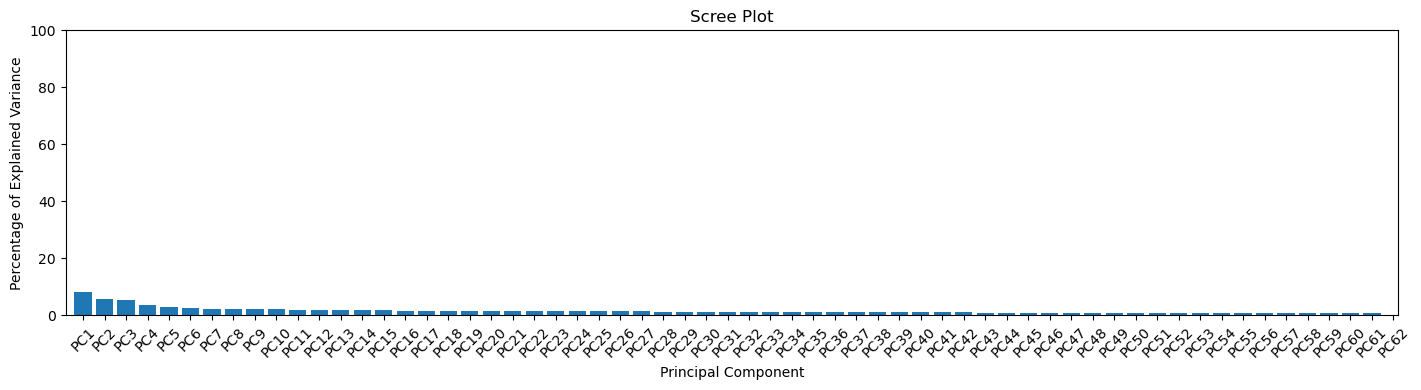

In [400]:
plt.figure(figsize=(14,4))
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0,100)
# Set x-axis limits to start slightly before the first tick
plt.xlim(0.2, len(per_var) + 0.2)
plt.show()

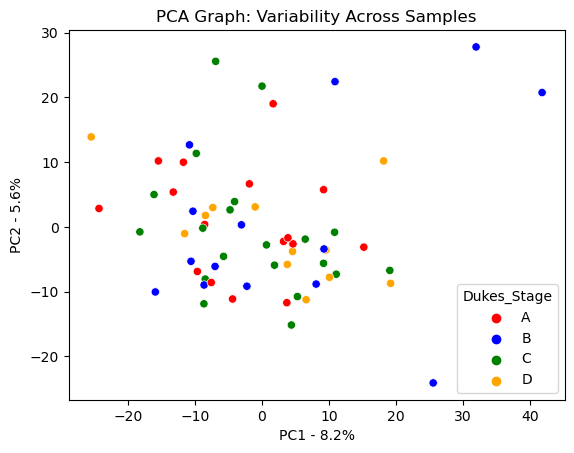

In [401]:
# Mapping categorical values to numerical values or colors
category_colors = {'A': 'red', 'B': 'blue', 'C': 'green', 'D': 'orange'}
color_values = df_merge_working['Dukes_Stage'].map(category_colors)

# Create the scatter plot using Seaborn
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=df_merge_working['Dukes_Stage'], palette=category_colors)

# Adding title and labels
plt.title('PCA Graph: Variability Across Samples')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

# Show plot
plt.show()

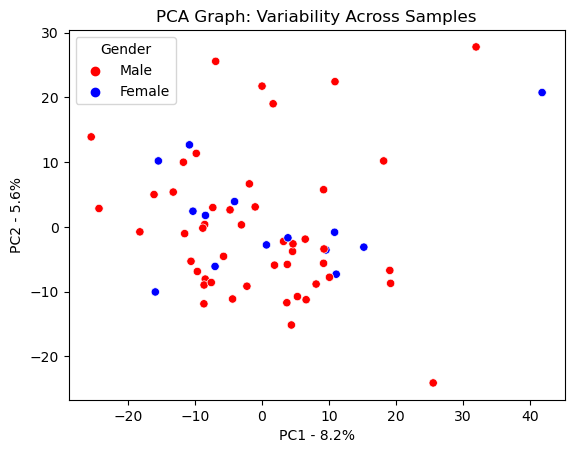

In [402]:
# Mapping categorical values to numerical values or colors
category_colors = {'Male': 'red', 'Female': 'blue'}
color_values = df_merge_working['Gender'].map(category_colors)

# Create the scatter plot using Seaborn
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=df_merge_working['Gender'], palette=category_colors)

# Adding title and labels
plt.title('PCA Graph: Variability Across Samples')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

# Show plot
plt.show()

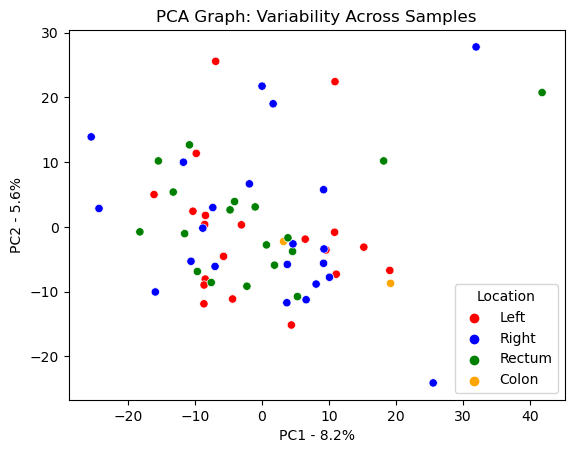

In [403]:
# Mapping categorical values to numerical values or colors
category_colors = {'Left': 'red', 'Right': 'blue', 'Rectum': 'green', 'Colon': 'orange'}
color_values = df_merge_working['Location'].map(category_colors)

# Create the scatter plot using Seaborn
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=df_merge_working['Location'], palette=category_colors)

# Adding title and labels
plt.title('PCA Graph: Variability Across Samples')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

# Show plot
plt.show()

**PCA on Transposed Dataset:** <br>
- The high percentage of variance captured by PC1 (93.9%) indicates that the majority of the variability in gene expression among samples (columns) is captured by this principal component.
- The presence of clear separation into clusters in the PCA plot suggests that there are strong patterns or relationships in gene expression across different samples.
- Further exploration of the samples within each cluster could provide insights into the biological or experimental factors driving the observed patterns.<br>

**PCA on Original Dataset:**<br>
- While PCA on the original dataset captured less variance in the data with PC1 (8.2%) and PC2 (5.6%), it's not uncommon for PCA on gene expression data with samples as rows to have lower variance explained by the first few principal components.
- The lack of clear separation into clusters in the PCA plot suggests that the variability in gene expression among samples may be more subtle or complex, making it difficult to separate samples based on gene expression profiles alone.
- It's possible that there are confounding factors or noise in the data that make it challenging to distinguish distinct clusters.